<h1 style="text-align: center;">Desafío - Regresión desde el aprendizaje de máquinas</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío: Individual.
Para la realización del desafío necesitarás apoyarte del archivo <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78283/activities/119112/items/610889">Apoyo Desafío - Regresión desde el aprendizaje de máquinas</a>.

## Habilidades a evaluar
- Identificar la regresión lineal y sus fundamentos.
- Reconocer los supuestos en los que la regresión tiene sustento teórico.
- Utilizar transformaciones simples en las variables independientes.
- Implementar un modelo predictivo con `scikit-learn`.
- Reconocer la terminología asociada a la modelación estadística.

## Descripción

Una consultora internacional radicada en EEUU está buscando analistas, por lo que han diseñado una prueba que permita poder seleccionar a quienes cuenten con las habilidades necesarias para crear modelación estadística. Para ello, ponen a disposición de los interesados una base de datos sobre los precios de las viviendas en Boston, utilizada en el paper Harrison Jr, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the demand for clean air. Journal of environmental economics and management, 5(1), 81-102.

El objetivo del ejercicio de captación de talento es desarrollar un modelo predictivo para el valor mediano de las casas mediante el entrenamiento de un modelo de regresión lineal.

- `crim`: Tasa de criminalidad por sector de Boston.
- `zn`: Proporción de terreno residencial asignado para terrenos baldíos.
- `indus`: Proporción de negocios no asociados al comercio por sector.
- `chas`: Dummy. 1 si el sector colinda con el río Charles, 0 de lo contrario.
- `nox`: Concentración de dióxido de carbono.
- `rm`: Cantidad promedio de habitaciones por casa.
- `age`: Proporción de casas construidas antes de 1940.
- `dis`: Distancia promedio a cinco centros de empleos.
- `rad`: Índice de accesibilidad a autopistas.
- `tax`: Nivel de impuestos asociados a viviendas.
- `ptratio`: Razón alumno:profesor por sector de Boston.
- `black`: Proporción de afroamericanos por sector de Boston.
- `lstat`: Porcentaje de población de estratos bajos.
- `medv`: Valor mediano de las casas **(Vector objetivo)**.

## Requerimientos
A continuación revisaremos los requerimientos y acciones que la empresa a la cual postulas te pide realizar.


### 1. Preparar el ambiente de trabajo (1 puntos)

- Importe las librerías básicas para el análisis de datos.
- Importe la clase `LinearRegression` del módulo `linear_model`, y las funciones `mean_squared_error`, `r2_score` y `train_test_split`.
- Importe la base de datos `boston.csv` y elimine la columna `Unnamed: 0`.
- Obtenga las medidas descriptivas de la base de datos con `describe()`.

In [79]:
# Utiliza esta celda para realizar los import solicitados y leer el set de datos en la forma solicitada
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split  
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv("boston.csv").drop("Unnamed: 0", axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [80]:
# Utiliza esta celda para explorar las medidas descriptivas del set de datos
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Comentarios de las medidas descriptivas** tiene 506 observaciones con 14 variables. solo me referire a medidas de medv que es el vector objetivo, tiene una media de 22.5 y desviacione estandar de 9.19, con un minimo de 5 y maximo de 50

### 2. Dividir la muestra (1 puntos)
- Genere conjuntos de entrenamiento y pruebas con `train_test_split`.
- Reserve un 33% de la muestra para el conjunto de pruebas.
- Incluya una semilla pseudoaleatoria a su elección, esto lo puede hacer con el argumento `random_state` dentro del método `train_test_plit`.

In [81]:
# Utiliza esta celda para generar los 4 subsets entregados por train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("medv", axis = 1), df["medv"], test_size = .33, random_state = 11238)

In [82]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
388,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,24,666,20.2,372.92,30.62
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73
134,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,262.76,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88
133,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03
484,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34
293,0.08265,0.0,13.92,0,0.437,6.127,18.4,5.5027,4,289,16.0,396.90,8.58


### 3. Generar modelos (2 puntos)
- Ahora implementaremos dos versiones del modelo lineal:
    - Con intercepto.
    - Sin intercepto.
- Cada versión debe generarse en un nuevo objeto inicializado.
- Posteriormente se deben entrenar los modelos especificando la matriz y vector de entrenamiento.
- Con los modelos entrenados, genere una predicción de la matriz de pruebas con el método `predict()`.

In [83]:
# Utiliza esta celda para instanciar y entrenar los dos modelos solicitados
modelo1 = LinearRegression(fit_intercept = True)
modelo2 = LinearRegression(fit_intercept = False)

modelo1.fit(X_train, y_train)


LinearRegression()

In [84]:
modelo2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [85]:
# Utiliza esta celda para generar predicciones para ambos modelos
modelo1_yhat = modelo1.predict(X_test)

In [86]:
modelo2_yhat = modelo2.predict(X_test)

### 4. Obtención de métricas (1 puntos)
- Ahora generaremos una función llamada `report_scores` que ingrese como argumentos el vector de datos predichos y el vector de datos por validar.
- La función debe imprimir las métricas del Error Cuadrático Promedio y R2.
- Reporte las métricas para ambos modelos. En base a ello, seleccione el mejor modelo.

In [87]:
# Utiliza esta celda para definir la función solicitada
def report_scores(y_test, y_hat):
    MSE = mean_squared_error(y_test, y_hat)
    r2 =  r2_score(y_test, y_hat)

    print(f"MSE: {MSE}, R2: {r2}")

In [88]:
# Utiliza esta celda para hacer el llamado a la función definida previamente para ambos modelos entrenados
report_scores(y_test, modelo1_yhat), report_scores(y_test, modelo2_yhat)

MSE: 30.697831517740802, R2: 0.6005199127106753
MSE: 34.269399961452756, R2: 0.5540420215010212


(None, None)

**Elección del mejor modelo y justificación**

### 5. Refactorización del modelo (1 puntos)
- Genere una función llamada `fetch_features` que ingrese como argumentos el set de datos y el nombre del vector objetivo. El nombre del vector debe ser `medv` por defecto.
- La función debe retornar una lista con las correlaciones entre cada atributo y el vector objetivo y su nombre.
- Reporte brevemente cuáles son los 6 atributos con una mayor correlación _absoluta_ con `medv` (de mayor a menor correlación).

In [89]:
# Utiliza esta celda para definir la función solicitada
def fetch_features(df, objetivo = "medv"):
   return df.corr()[objetivo].abs().sort_values(ascending=False).drop(objetivo).head(6)

In [90]:
# Utiliza esta celda para hacer el llamado a la función definida previamente
fetch_features(df).index

Index(['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox'], dtype='object')

In [91]:
seleccion = list(fetch_features(df).index)

In [92]:
seleccion

['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox']

### 6. Refactorización del modelo predictivo (2 puntos)
- Genere otros conjuntos de entrenamiento y validación en base a una matriz con los 6 atributos identificados en el ejercicio anterior, y el vector objetivo.
- Entrene un modelo en base al mejor desempeño.
- Reporte las métricas para el nuevo modelo.

In [93]:
seleccion.append("medv")

In [94]:
df_seleccion = df[seleccion]
df_seleccion.head(1)

,lstat,rm,ptratio,indus,tax,nox,medv
0,4.98,6.575,15.3,2.31,296,0.538,24.0


In [95]:
# Utiliza esta celda para generar los nuevos subserts de train y test
X_train, X_test, y_train, y_test = train_test_split(df_seleccion.drop("medv", axis = 1), df_seleccion["medv"], test_size = .33, random_state = 11238)

In [96]:
# Utiliza esta celda para entrenar el nuevo modelo
modelo3 = LinearRegression(fit_intercept = True)
modelo3.fit(X_train, y_train)
modelo3.predict(X_test)

array([31.7154155 , 24.86653591, 21.61377952, 19.49294024, 21.2161735 ,
       26.13967462, 25.08101932, 28.79999134, 23.52759539, 20.90434083,
       28.3738251 , 22.58028404, 19.46077415, 28.04063226, 17.67793017,
       19.49272448, 31.2664637 , 25.42080231, 23.23468695, 17.14740981,
       15.10293691, 24.99615742, 16.15015849, 15.50423755, 20.78768924,
       32.65013017, 24.77688799, 18.86346762, 18.39245434, 16.89961266,
       18.09143602, 19.26992544, 26.08310975, 17.46071904, 13.54108939,
       22.78144451, 23.80352985, 18.2991265 , 31.82150031, 31.05867465,
       18.32267256, 19.76828209, 34.65560416, 27.0308222 , 28.1548651 ,
       33.92956697, 23.00042356, 29.42845064, 29.10995088, 25.86561102,
       19.07713735, 27.6824574 , 17.12353655, 15.86969425, 22.5138358 ,
       17.92516194, 24.62439942, 19.65164806, 22.76785078, 24.7127325 ,
       19.51239488, 14.49680611, 25.62624888, 14.34669708, 21.01931291,
       36.21089149, 14.06228619, 17.086307  , 27.60304903, 30.74

In [97]:
# Utiliza esta celda para reportar las métricas del nuevo modelo
modelo3_yhat = modelo3.predict(X_test)
report_scores(y_test, modelo3_yhat)

MSE: 37.51916467496898, R2: 0.5117518587357794


**Comentarios**El rendimiento bajo un poco, el MSE aumento, esto puede ocurrir porque se quitaron variables.    

### 7. Predicción de casos (2 puntos): 

- A continuación se generaron dos `np.array` que representan el peor escenario posible (worst_neighbor) y el mejor escenario posible (best_neighbor).
- Las variables representan, para cada caso, los valores de los siguientes atributos (en el mismo orden entregado): `lstat`, `rm`, `ptratio`, `indus`, `tax`, `nox`.

In [98]:
worst_neighbor = np.array([37.9, 12.6, 3.5, 27.7, 187, 0.87]).reshape(1, -1)
best_neighbor = np.array([1.73, 22, 8.7, 0.46, 711, 0.38]).reshape(1, -1)

- Ingrese los `np.array` en el modelo entrenado en el ejercicio anterior, y reporte la predicción entregada por el modelo.

In [99]:
# Utiliza esta celda para realizar una predicción para worst_neighbor

modelo3.predict(worst_neighbor)

array([59.97435265])

In [100]:
# Utiliza esta celda para realizar una predicción para best_neighbor
modelo3.predict(best_neighbor)

array([118.55978502])

**Comentarios** Se puede ver que el modelo de best_neghbor tiene un valor mayor, que es porque deberia tener mejor condiciones

**Adicional al desafio**

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("medv", axis = 1), df["medv"], test_size = .33, random_state = 11238)

In [103]:
modelo1 = LinearRegression(fit_intercept = True)

In [104]:
modelo1.fit(X_train, y_train)

LinearRegression()

In [105]:
modelo1_yhat = modelo1.predict(X_test)

In [106]:
df_resultados = X_test\
                .assign(real = y_test)\
                .assign(modelo1 = modelo1_yhat)\
                .assign(modelo2 = modelo2_yhat)

In [107]:
df_resultados

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,real,modelo1,modelo2
191,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5,30.531588,29.738002
164,2.24236,0.0,19.58,0,0.605,5.854,91.8,2.4220,5,403,14.7,395.11,11.64,22.7,24.750931,22.445633
132,0.59005,0.0,21.89,0,0.624,6.372,97.9,2.3274,4,437,21.2,385.76,11.12,23.0,19.810385,21.658883
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44,16.0,17.422823,17.685582
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0,22.509701,21.811075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0,23.935532,23.231775
63,0.12650,25.0,5.13,0,0.453,6.762,43.4,7.9809,8,284,19.7,395.58,9.50,25.0,23.204047,25.154547
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,36.5,36.305647,35.559594
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,29.341915,30.256919


<AxesSubplot:xlabel='real', ylabel='Density'>

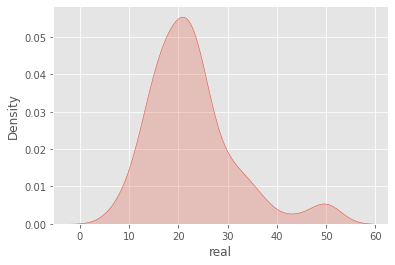

In [108]:
sns.kdeplot(df_resultados["real"], label="real", fill = True)

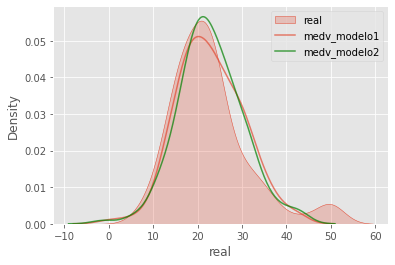

In [109]:
sns.kdeplot(df_resultados["real"], label="real", fill = True)
sns.kdeplot(df_resultados["modelo1"], label="medv_modelo1", alpha = .7)
sns.kdeplot(df_resultados["modelo2"], label="medv_modelo2", alpha = .7, color = "green")

plt.legend();